In [2]:
!pip install tensorflow

DEPRECATION: pytorch-lightning 1.5.6 has a non-standard dependency specifier torch>=1.7.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [3]:
import tensorflow as tf
from tensorflow.python.summary.summary_iterator import summary_iterator

def extract_data_from_event_file(event_file):
    data = {}
    for e in summary_iterator(event_file):
        for v in e.summary.value:
            if v.tag not in data:
                data[v.tag] = []
            data[v.tag].append((e.step, v.simple_value))
    return data

# event_file_path = '/home/ken67/livecellx/notebooks/ViT_scripts/ViT_workdirs/ViT_lightning_logs/frame_0-5-mask /events.out.tfevents.1705092098.xing-lab-5.592897.0'  # replace with your file path
# event_file_path = "/home/ken67/livecellx/notebooks/ViT_scripts/ViT_workdirs/ViT_lightning_logs/frame_1-5-combined/events.out.tfevents.1705043460.xing-lab-5.154198.0"
# extracted_data = extract_data_from_event_file(event_file_path)


2024-01-31 07:12:21.351229: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-31 07:12:21.351257: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-31 07:12:21.352412: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-31 07:12:21.358375: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-31 07:12:21.851856: W tensorflow/compiler/tf2

In [4]:
import os 
model_out_dir =  '/home/ken67/livecellx/notebooks/ViT_scripts/ViT_workdirs/ViT_lightning_logs/'
# all subfolder in model_out_dir
model_dirs = [f.path for f in os.scandir(model_out_dir) if f.is_dir() ]

# all event files in each subfolder
event_files = []
for model_dir in model_dirs:
    _model_events = [f.path for f in os.scandir(model_dir) if f.is_file() and f.name.startswith('events.out.tfevents')]
    assert len(_model_events) == 1, _model_events
    event_files.append(_model_events[0])

event_files = sorted(event_files)

In [5]:
all_extracted_data = []
for event in event_files:
    extracted_data = extract_data_from_event_file(event)
    all_extracted_data.append(extracted_data)


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


In [6]:
# Visualize data

for i, data in enumerate(all_extracted_data):
    print(i)
    print(data.keys())

0
dict_keys(['hp_metric', '_hparams_/experiment', '_hparams_/session_start_info', '_hparams_/session_end_info'])
1
dict_keys(['hp_metric', '_hparams_/experiment', '_hparams_/session_start_info', '_hparams_/session_end_info', 'train_loss_step', 'train_acc_step', 'epoch', 'val_loss_step', 'val_acc_step', 'val_loss_epoch', 'val_acc_epoch', 'train_loss_epoch', 'train_acc_epoch'])
2
dict_keys(['hp_metric', '_hparams_/experiment', '_hparams_/session_start_info', '_hparams_/session_end_info', 'train_loss_step', 'train_acc_step', 'epoch', 'val_loss_step', 'val_acc_step', 'val_loss_epoch', 'val_acc_epoch', 'train_loss_epoch', 'train_acc_epoch'])
3
dict_keys(['hp_metric', '_hparams_/experiment', '_hparams_/session_start_info', '_hparams_/session_end_info', 'train_loss_step', 'train_acc_step', 'epoch', 'val_loss_step', 'val_acc_step', 'val_loss_epoch', 'val_acc_epoch', 'train_loss_epoch', 'train_acc_epoch'])
4
dict_keys(['train_loss_step', 'train_acc_step', 'epoch', 'val_loss_step', 'val_acc_step

In [7]:
event_files

['/home/ken67/livecellx/notebooks/ViT_scripts/ViT_workdirs/ViT_lightning_logs/4090-frame_0-5-combined-batchsize-128/events.out.tfevents.1705425774.xing-lab-5.2040635.0',
 '/home/ken67/livecellx/notebooks/ViT_scripts/ViT_workdirs/ViT_lightning_logs/4090-frame_1-5-combined-batchsize-128/events.out.tfevents.1705233907.xing-lab-5.1250328.0',
 '/home/ken67/livecellx/notebooks/ViT_scripts/ViT_workdirs/ViT_lightning_logs/4090-frame_1-5-combined-batchsize-32/events.out.tfevents.1705231759.xing-lab-5.1236165.0',
 '/home/ken67/livecellx/notebooks/ViT_scripts/ViT_workdirs/ViT_lightning_logs/4090-frame_1-5-combined-batchsize-64/events.out.tfevents.1705231976.xing-lab-5.1241306.0',
 '/home/ken67/livecellx/notebooks/ViT_scripts/ViT_workdirs/ViT_lightning_logs/cluster-frame_1-5-combined/events.out.tfevents.1705211693.g008',
 '/home/ken67/livecellx/notebooks/ViT_scripts/ViT_workdirs/ViT_lightning_logs/frame_0-5-combined/events.out.tfevents.1705145869.g002',
 '/home/ken67/livecellx/notebooks/ViT_script

In [8]:
event_files

['/home/ken67/livecellx/notebooks/ViT_scripts/ViT_workdirs/ViT_lightning_logs/4090-frame_0-5-combined-batchsize-128/events.out.tfevents.1705425774.xing-lab-5.2040635.0',
 '/home/ken67/livecellx/notebooks/ViT_scripts/ViT_workdirs/ViT_lightning_logs/4090-frame_1-5-combined-batchsize-128/events.out.tfevents.1705233907.xing-lab-5.1250328.0',
 '/home/ken67/livecellx/notebooks/ViT_scripts/ViT_workdirs/ViT_lightning_logs/4090-frame_1-5-combined-batchsize-32/events.out.tfevents.1705231759.xing-lab-5.1236165.0',
 '/home/ken67/livecellx/notebooks/ViT_scripts/ViT_workdirs/ViT_lightning_logs/4090-frame_1-5-combined-batchsize-64/events.out.tfevents.1705231976.xing-lab-5.1241306.0',
 '/home/ken67/livecellx/notebooks/ViT_scripts/ViT_workdirs/ViT_lightning_logs/cluster-frame_1-5-combined/events.out.tfevents.1705211693.g008',
 '/home/ken67/livecellx/notebooks/ViT_scripts/ViT_workdirs/ViT_lightning_logs/frame_0-5-combined/events.out.tfevents.1705145869.g002',
 '/home/ken67/livecellx/notebooks/ViT_script

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


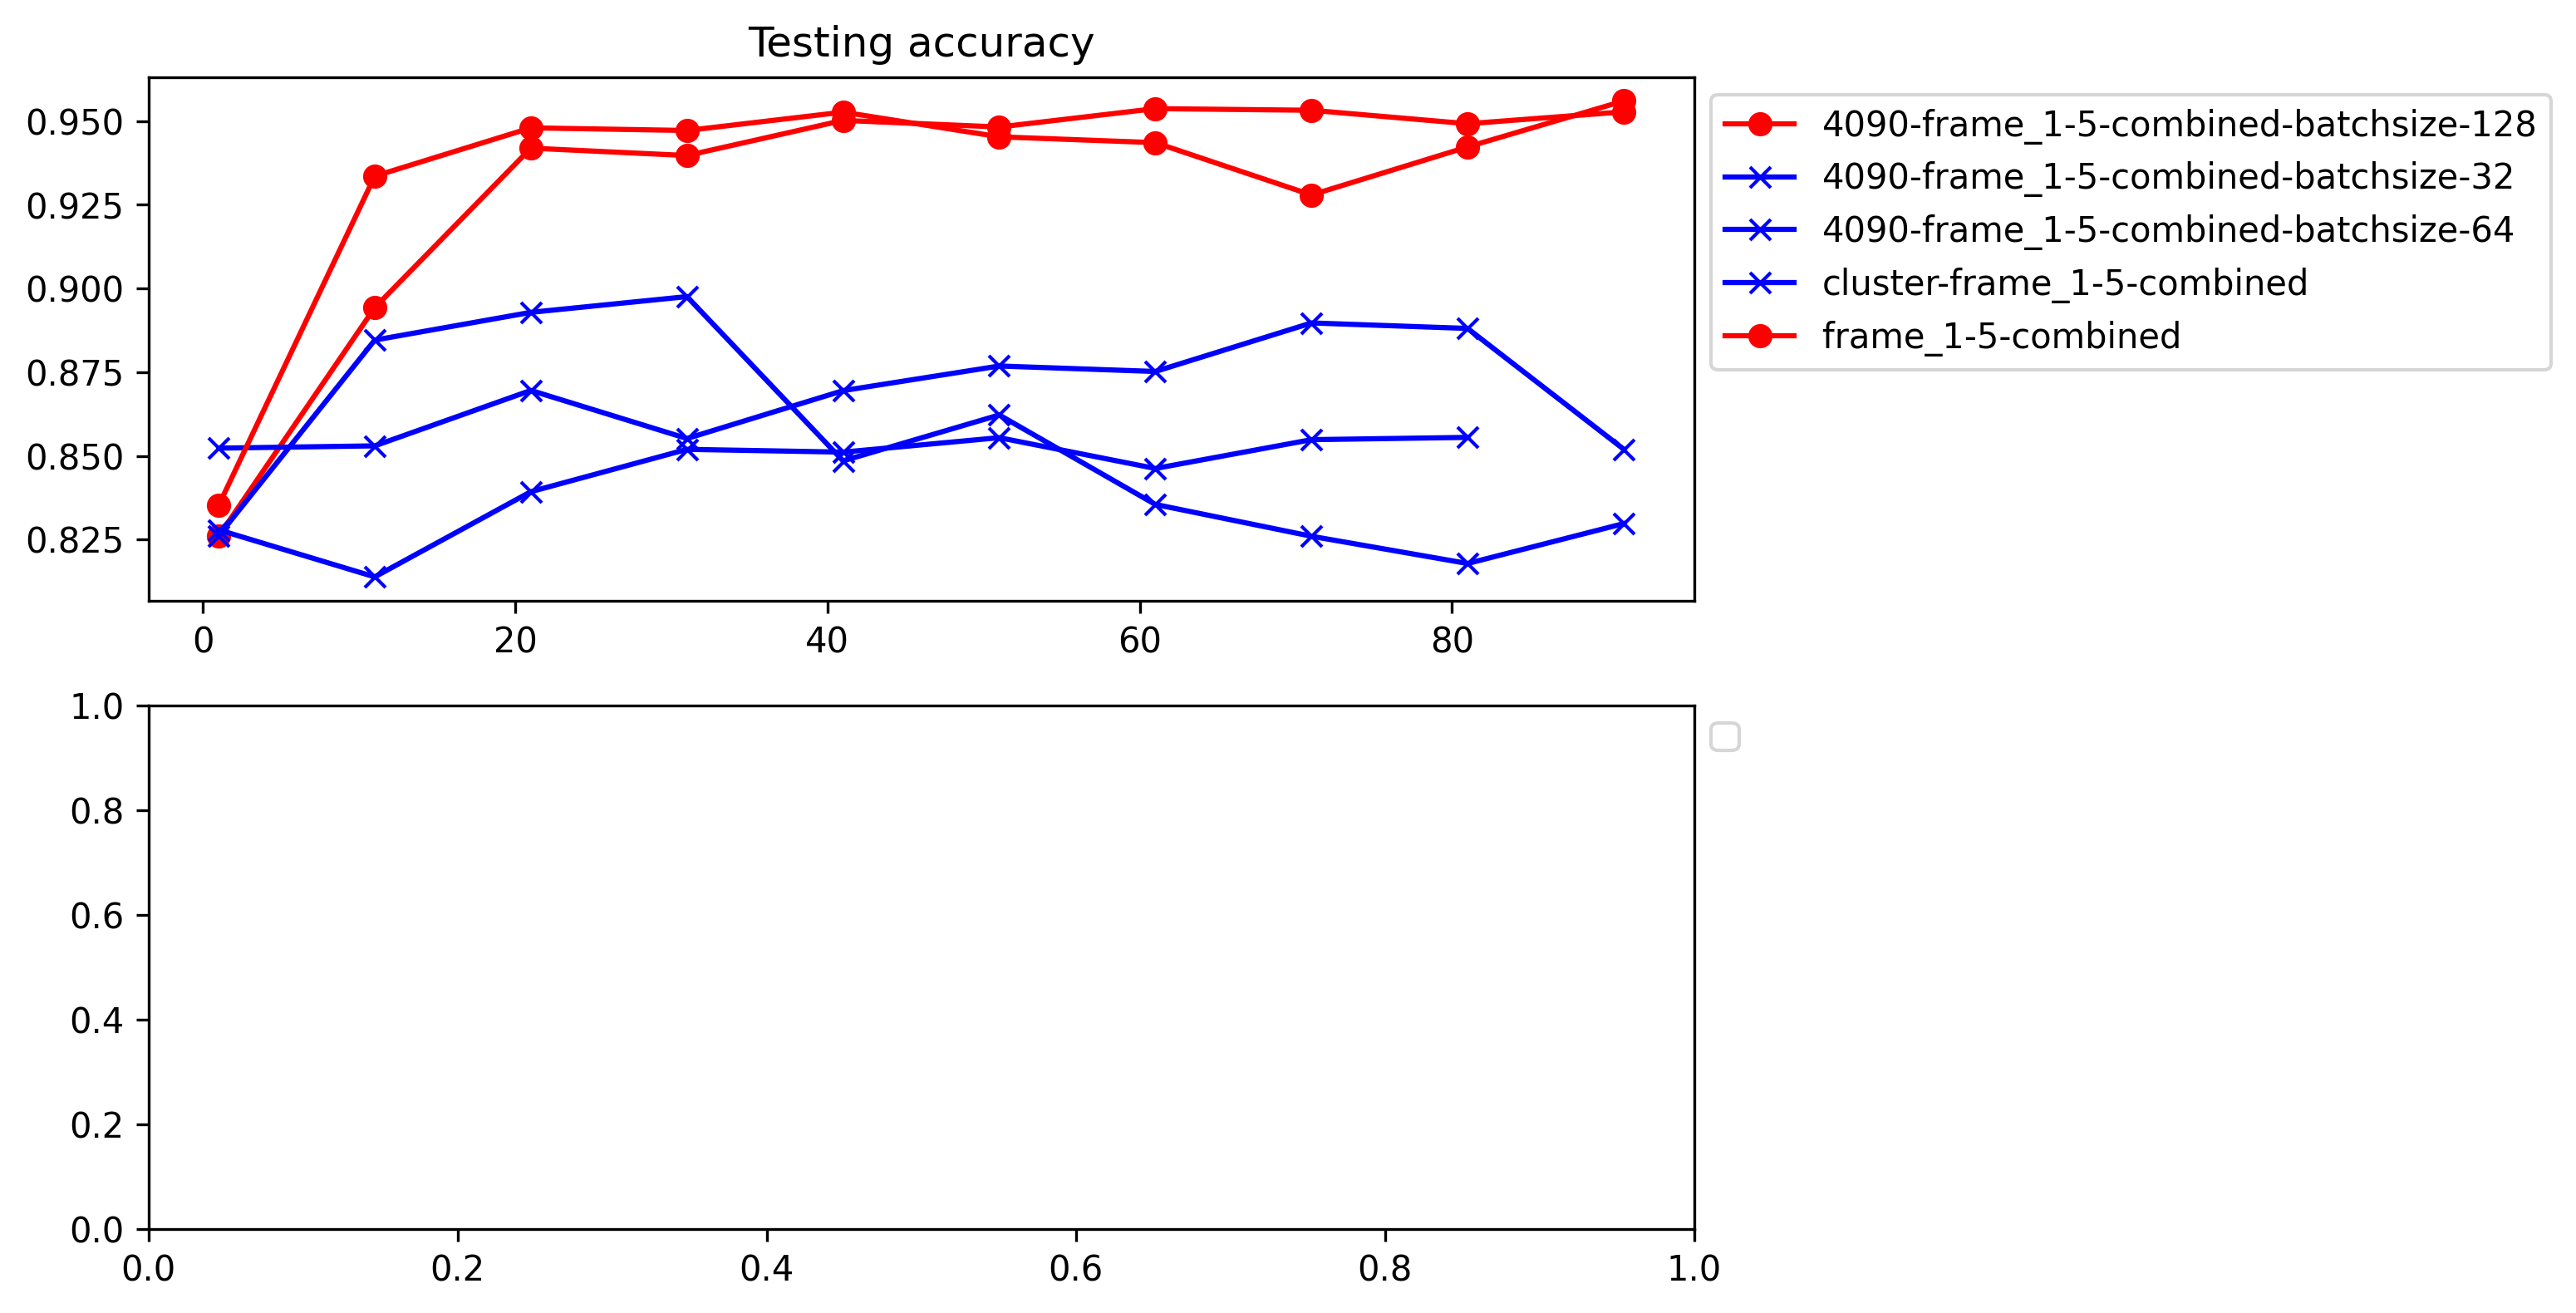

In [9]:
from pathlib import Path
import matplotlib.pyplot as plt
key = 'val_acc_epoch'


# Create a figure and a set of subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 6), dpi=300)
markers = ['v', '^', '<', '>', '1', 'o', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']

chosen_event_file_indices = [1 , 2 ,3, 4, 7]
chosen_event_files = [event_files[i] for i in chosen_event_file_indices]
chosen_all_extracted_data = [all_extracted_data[i] for i in chosen_event_file_indices]

STEP = 10
for i, data in enumerate(chosen_all_extracted_data):
    if key not in data:
        print(">>> warning: key {} not in data from {}".format(key, chosen_event_files[i]))
        continue
    _avg_accs = [y for x, y in data[key]]
    # plt.plot(xs, ys, label=str(i))
    _marker = markers[i % len(markers)]
    if i !=0 and i!= len(chosen_all_extracted_data)-1:
        _marker = 'x'
        _color = 'blue'
    else:
        _marker = 'o'
        _color = 'red'
    # Plot the training data
    _label = Path(chosen_event_files[i]).parent.name
    axs[0].plot(range(1, len(_avg_accs) + 1, STEP), _avg_accs[::STEP], marker=_marker, 
                color=_color, 
                label=_label)

plt.legend()

# Add legends to the subplots
for ax in axs:
    ax.legend(loc="upper left", bbox_to_anchor=(1,1))
axs[0].title.set_text('Testing accuracy')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


>>> warning: key val_acc_epoch not in data from /home/ken67/livecellx/notebooks/ViT_scripts/ViT_workdirs/ViT_lightning_logs/4090-frame_0-5-combined-batchsize-128/events.out.tfevents.1705425774.xing-lab-5.2040635.0


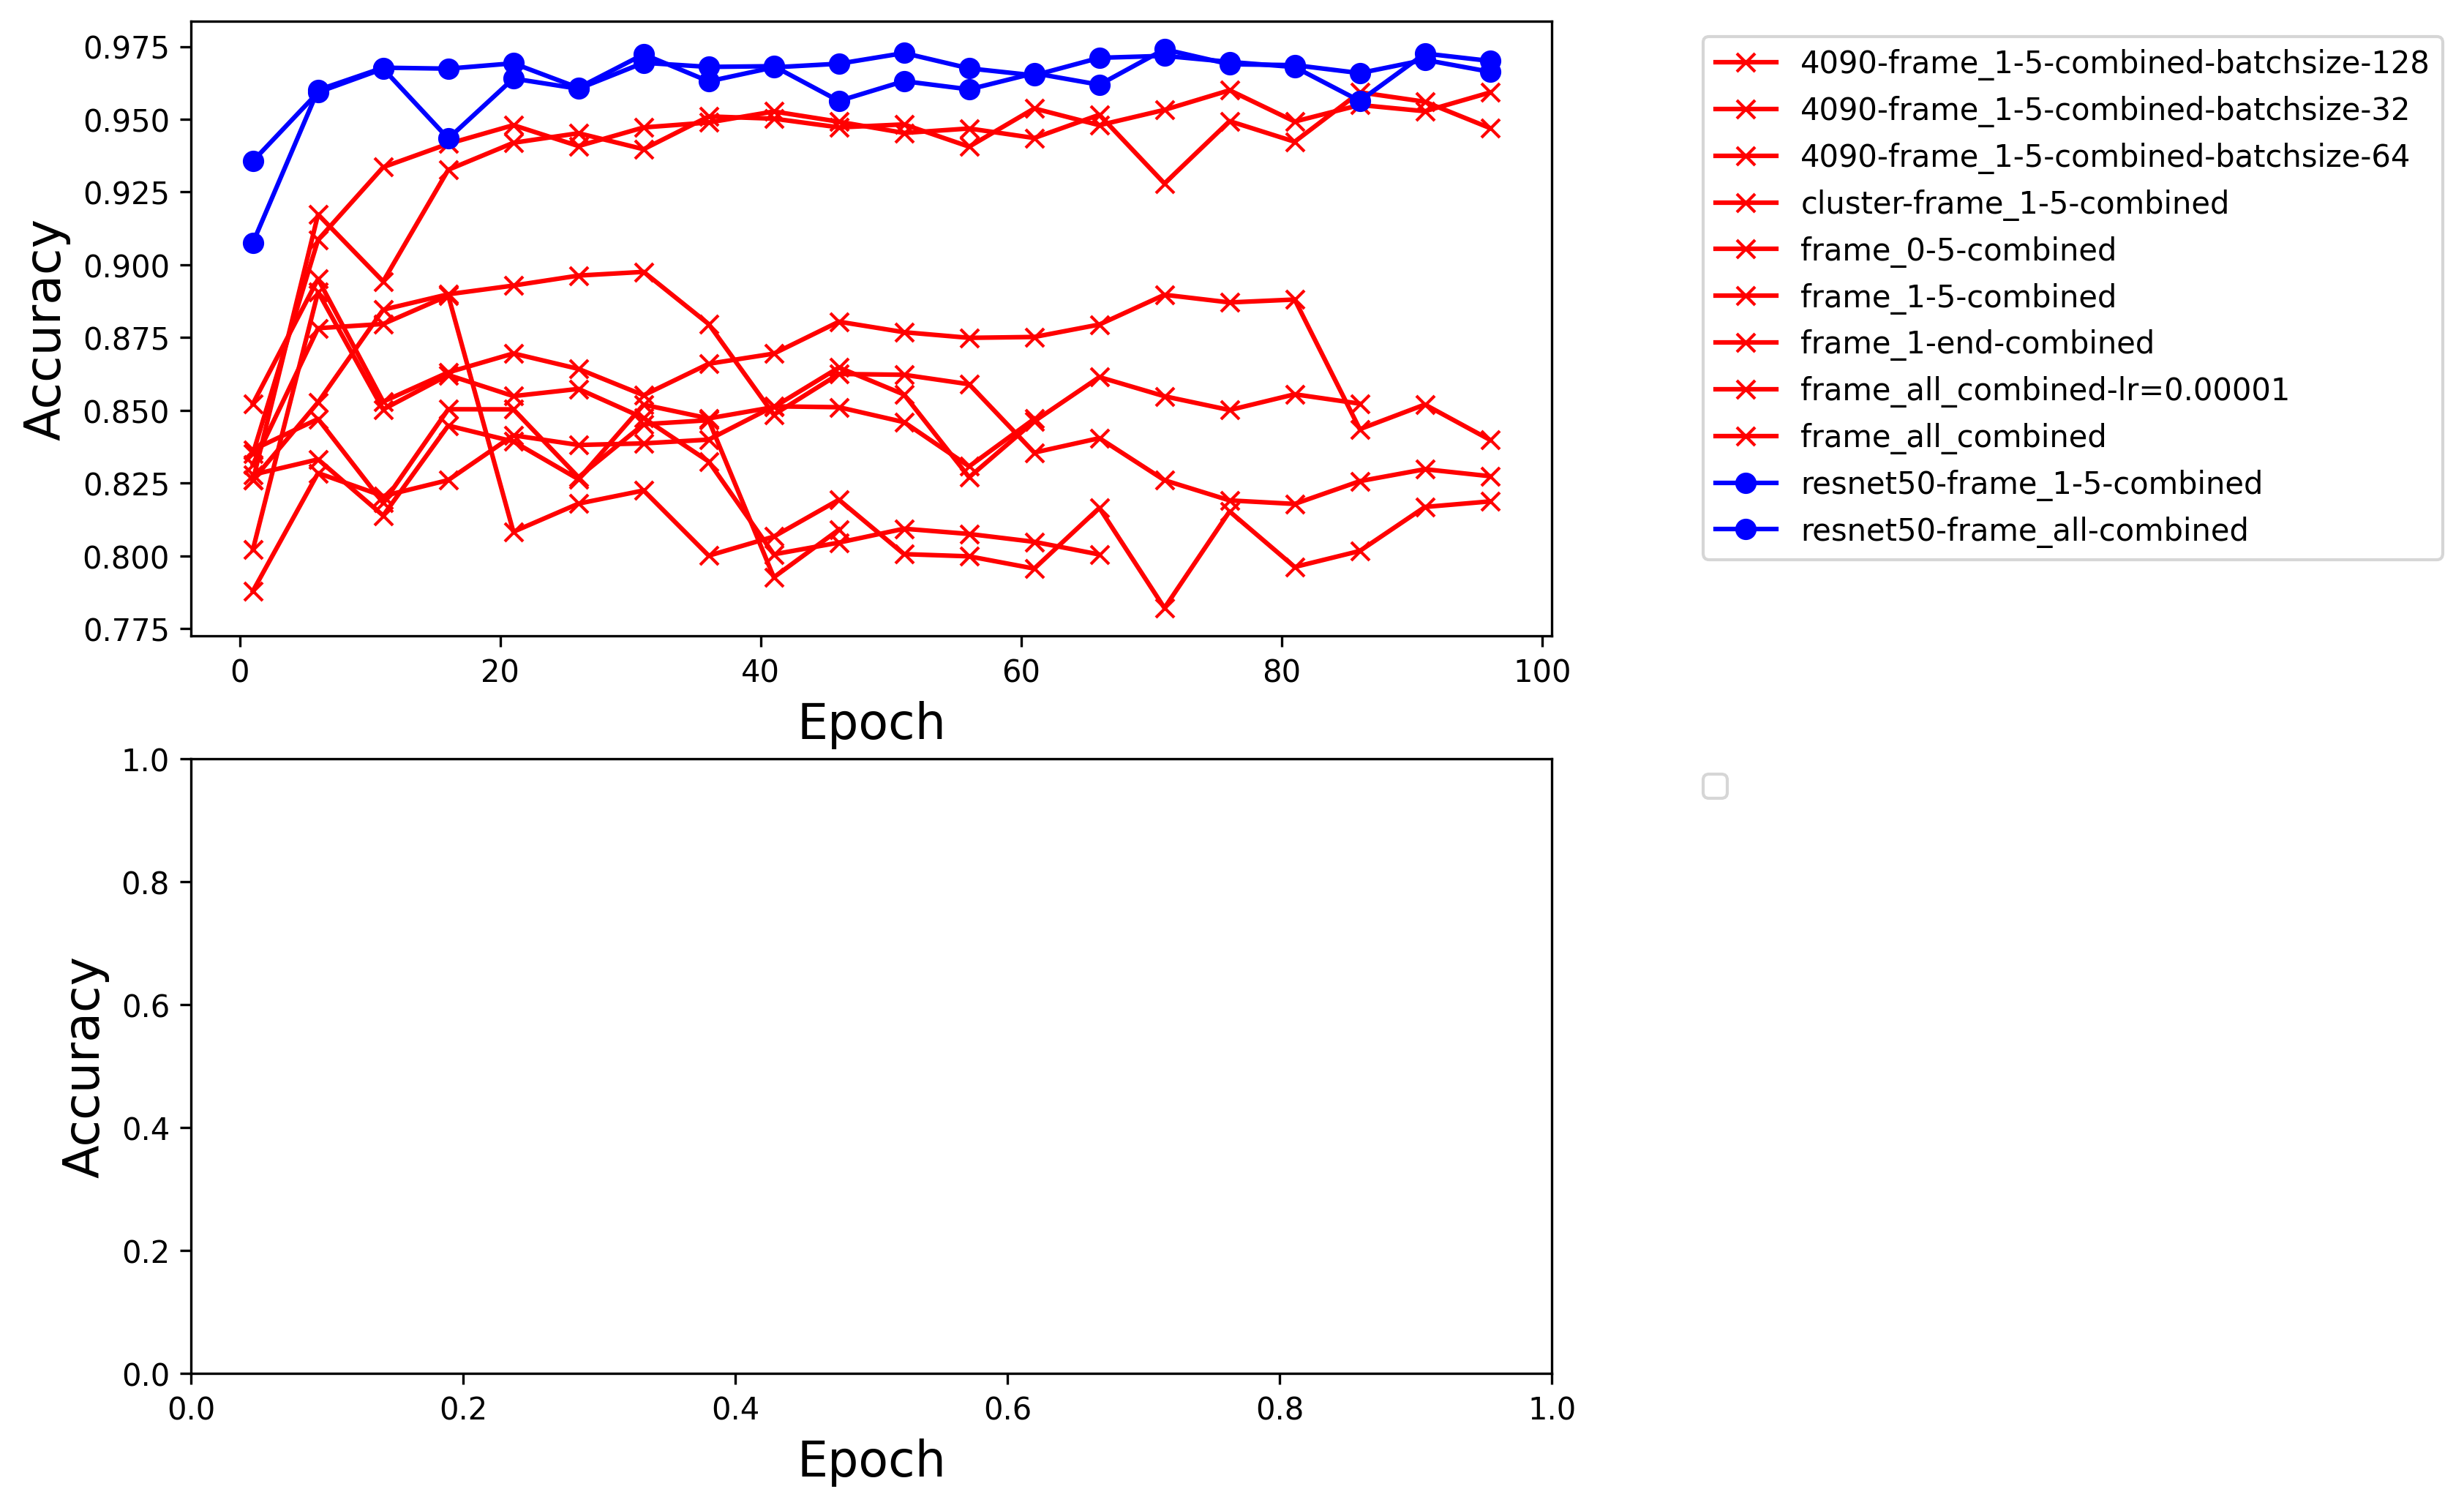

In [10]:
from pathlib import Path
import matplotlib.pyplot as plt
key = 'val_acc_epoch'


# Create a figure and a set of subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 8), dpi=300)
markers = ['v', '^', '<', '>', '1', 'o', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']

chosen_event_file_indices = range(len(event_files))
chosen_event_files = [event_files[i] for i in chosen_event_file_indices]
chosen_all_extracted_data = [all_extracted_data[i] for i in chosen_event_file_indices]

STEP = 5
for i, data in enumerate(chosen_all_extracted_data):
    if key not in data:
        print(">>> warning: key {} not in data from {}".format(key, chosen_event_files[i]))
        continue
    _avg_accs = [y for x, y in data[key]]
    print(">>> ", chosen_event_files[i])
    print(">>> max acc: ", max(_avg_accs))
    _label = Path(chosen_event_files[i]).parent.name
    _marker = markers[i % len(markers)]
    if _label.find('combined') == -1:
        continue 
    elif _label.find('resnet') != -1:
        _marker = 'o'
        _color = 'blue'
    else:
        _marker = 'x'
        _color = 'red'
    # _color = 'red'
    # Plot the training data
    
    axs[0].plot(range(1, len(_avg_accs) + 1, STEP), _avg_accs[::STEP], marker=_marker, 
                color=_color, 
                label=_label)

plt.legend()

# Add legends to the subplots
for ax in axs:
    ax.legend(loc="upper left", bbox_to_anchor=(1.1,1))

# Set the x-axis and y-axis labels of the subplots
for ax in axs:
    ax.set_xlabel('Epoch', fontsize=16)
    ax.set_ylabel('Accuracy', fontsize=16)

# Set the y-axis range for all subplots
# for ax in axs:
#     ax.set_ylim([0.86, 1])


>>> warning: key val_acc_epoch not in data from /home/ken67/livecellx/notebooks/ViT_scripts/ViT_workdirs/ViT_lightning_logs/4090-frame_0-5-combined-batchsize-128/events.out.tfevents.1705425774.xing-lab-5.2040635.0


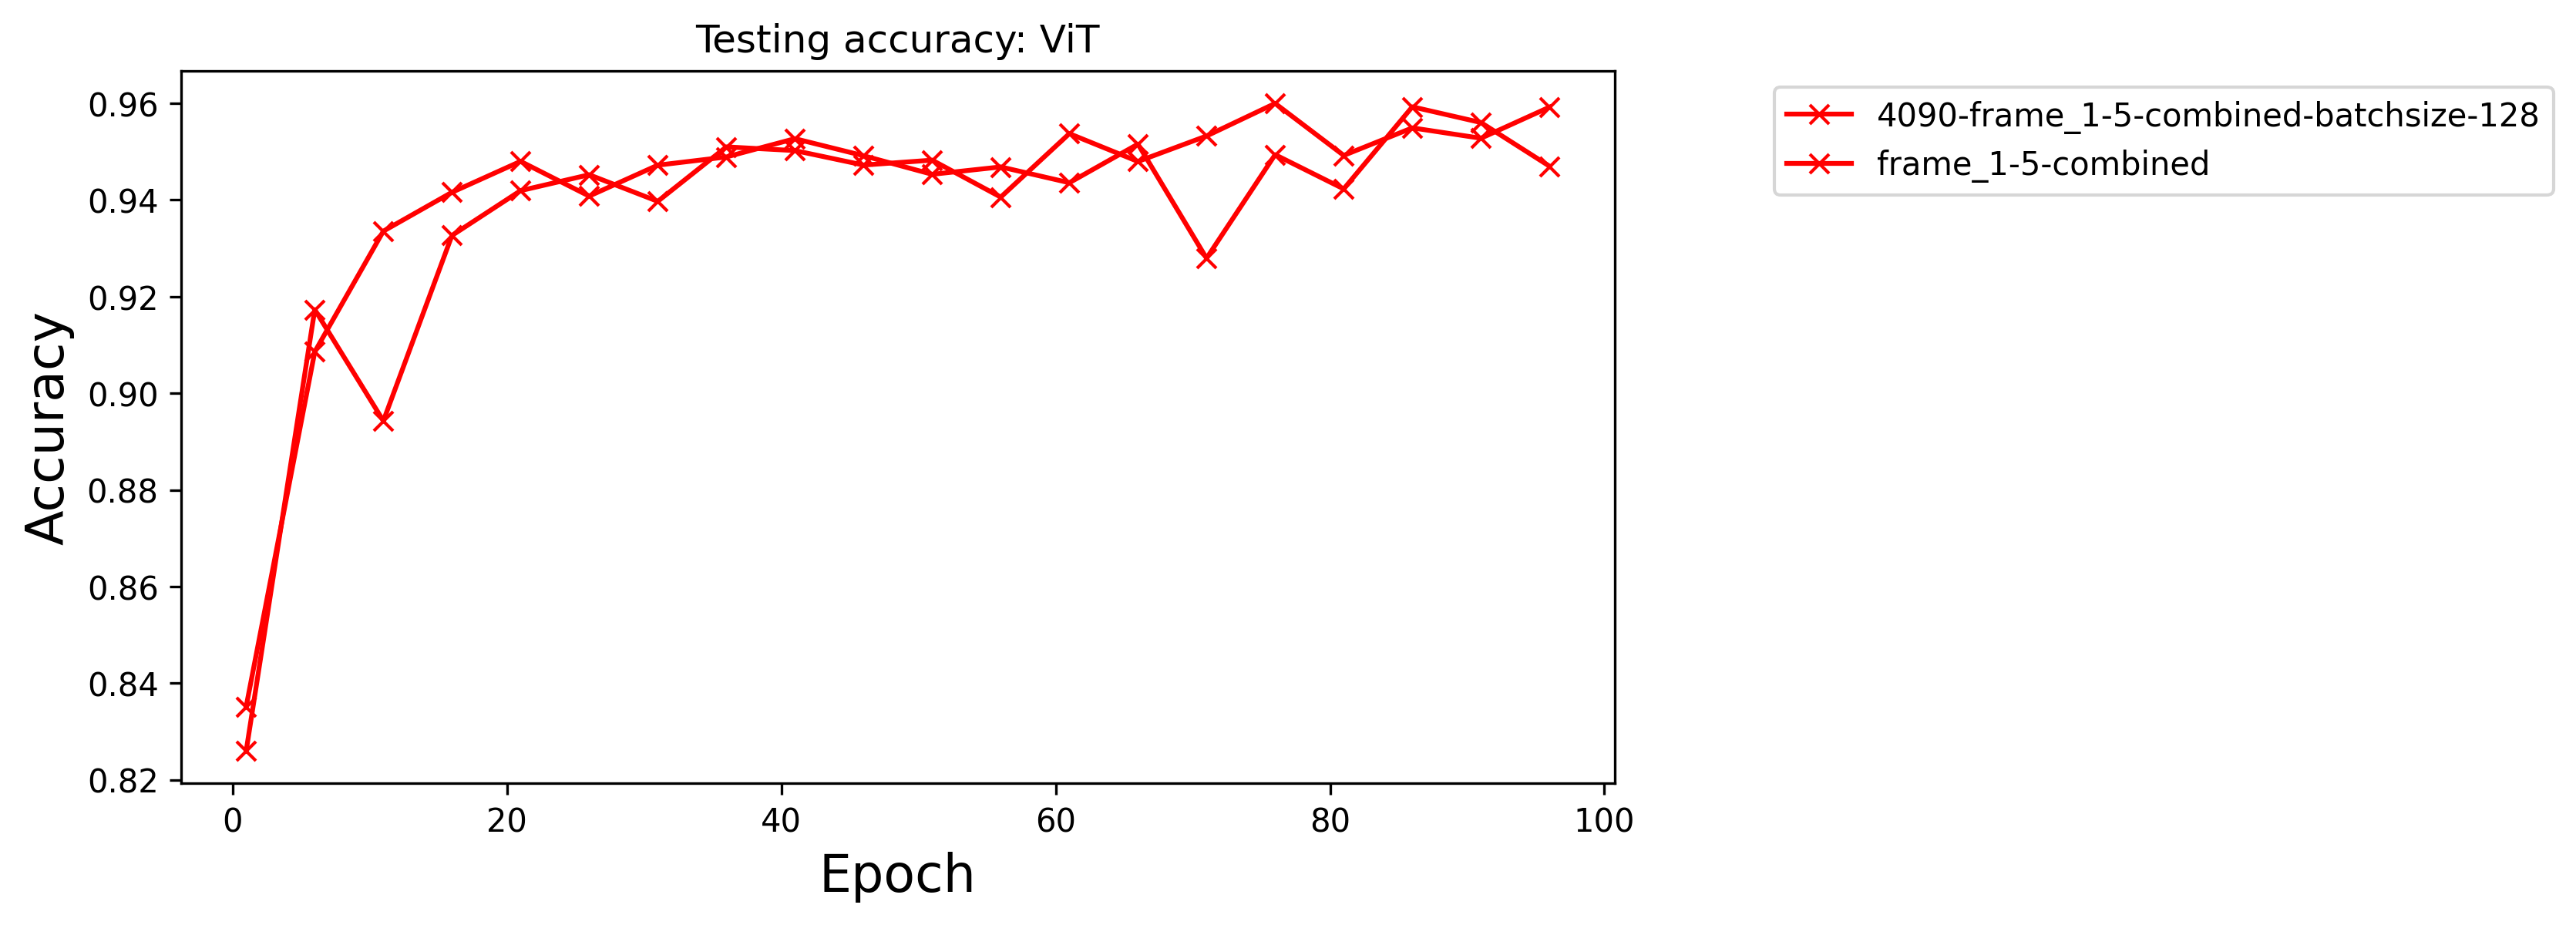

In [32]:
from pathlib import Path
import matplotlib.pyplot as plt
# key = 'train_acc_epoch'

key = 'val_acc_epoch'

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 1, figsize=(8, 4), dpi=300)
axs = [axs]

markers = ['v', '^', '<', '>', '1', 'o', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']

chosen_event_file_indices = range(len(event_files))
chosen_event_files = [event_files[i] for i in chosen_event_file_indices]
chosen_all_extracted_data = [all_extracted_data[i] for i in chosen_event_file_indices]

STEP = 5
for i, data in enumerate(chosen_all_extracted_data):
    if key not in data:
        print(">>> warning: key {} not in data from {}".format(key, chosen_event_files[i]))
        continue
    _avg_accs = [y for x, y in data[key]]

    _label = Path(chosen_event_files[i]).parent.name
    _marker = markers[i % len(markers)]
    if max(_avg_accs) < 0.95 or _label.find("resnet") != -1:
        continue   
    if _label.find("resnet") == -1:
        _marker = 'x'
    else:
        _marker = 'o'
    if _label.find('combined') == -1:
        _color = 'blue'
    else:
        _color = 'red'
    # _color = 'red'
    # Plot the training data
    
    axs[0].plot(range(1, len(_avg_accs) + 1, STEP), _avg_accs[::STEP], marker=_marker, 
                color=_color, 
                label=_label)

plt.legend()

# Add legends to the subplots
for ax in axs:
    ax.legend(loc="upper left", bbox_to_anchor=(1.1,1))

# Set the x-axis and y-axis labels of the subplots
for ax in axs:
    ax.set_xlabel('Epoch', fontsize=16)
    ax.set_ylabel('Accuracy', fontsize=16)

# Set the y-axis range for all subplots
# for ax in axs:
#     ax.set_ylim([0.86, 1])
axs[0].title.set_text('Testing accuracy: ViT')
# axs[0].title.set_text('Training accuracy: ResNet50')

>>> warning: key val_acc_epoch not in data from /home/ken67/livecellx/notebooks/ViT_scripts/ViT_workdirs/ViT_lightning_logs/4090-frame_0-5-combined-batchsize-128/events.out.tfevents.1705425774.xing-lab-5.2040635.0


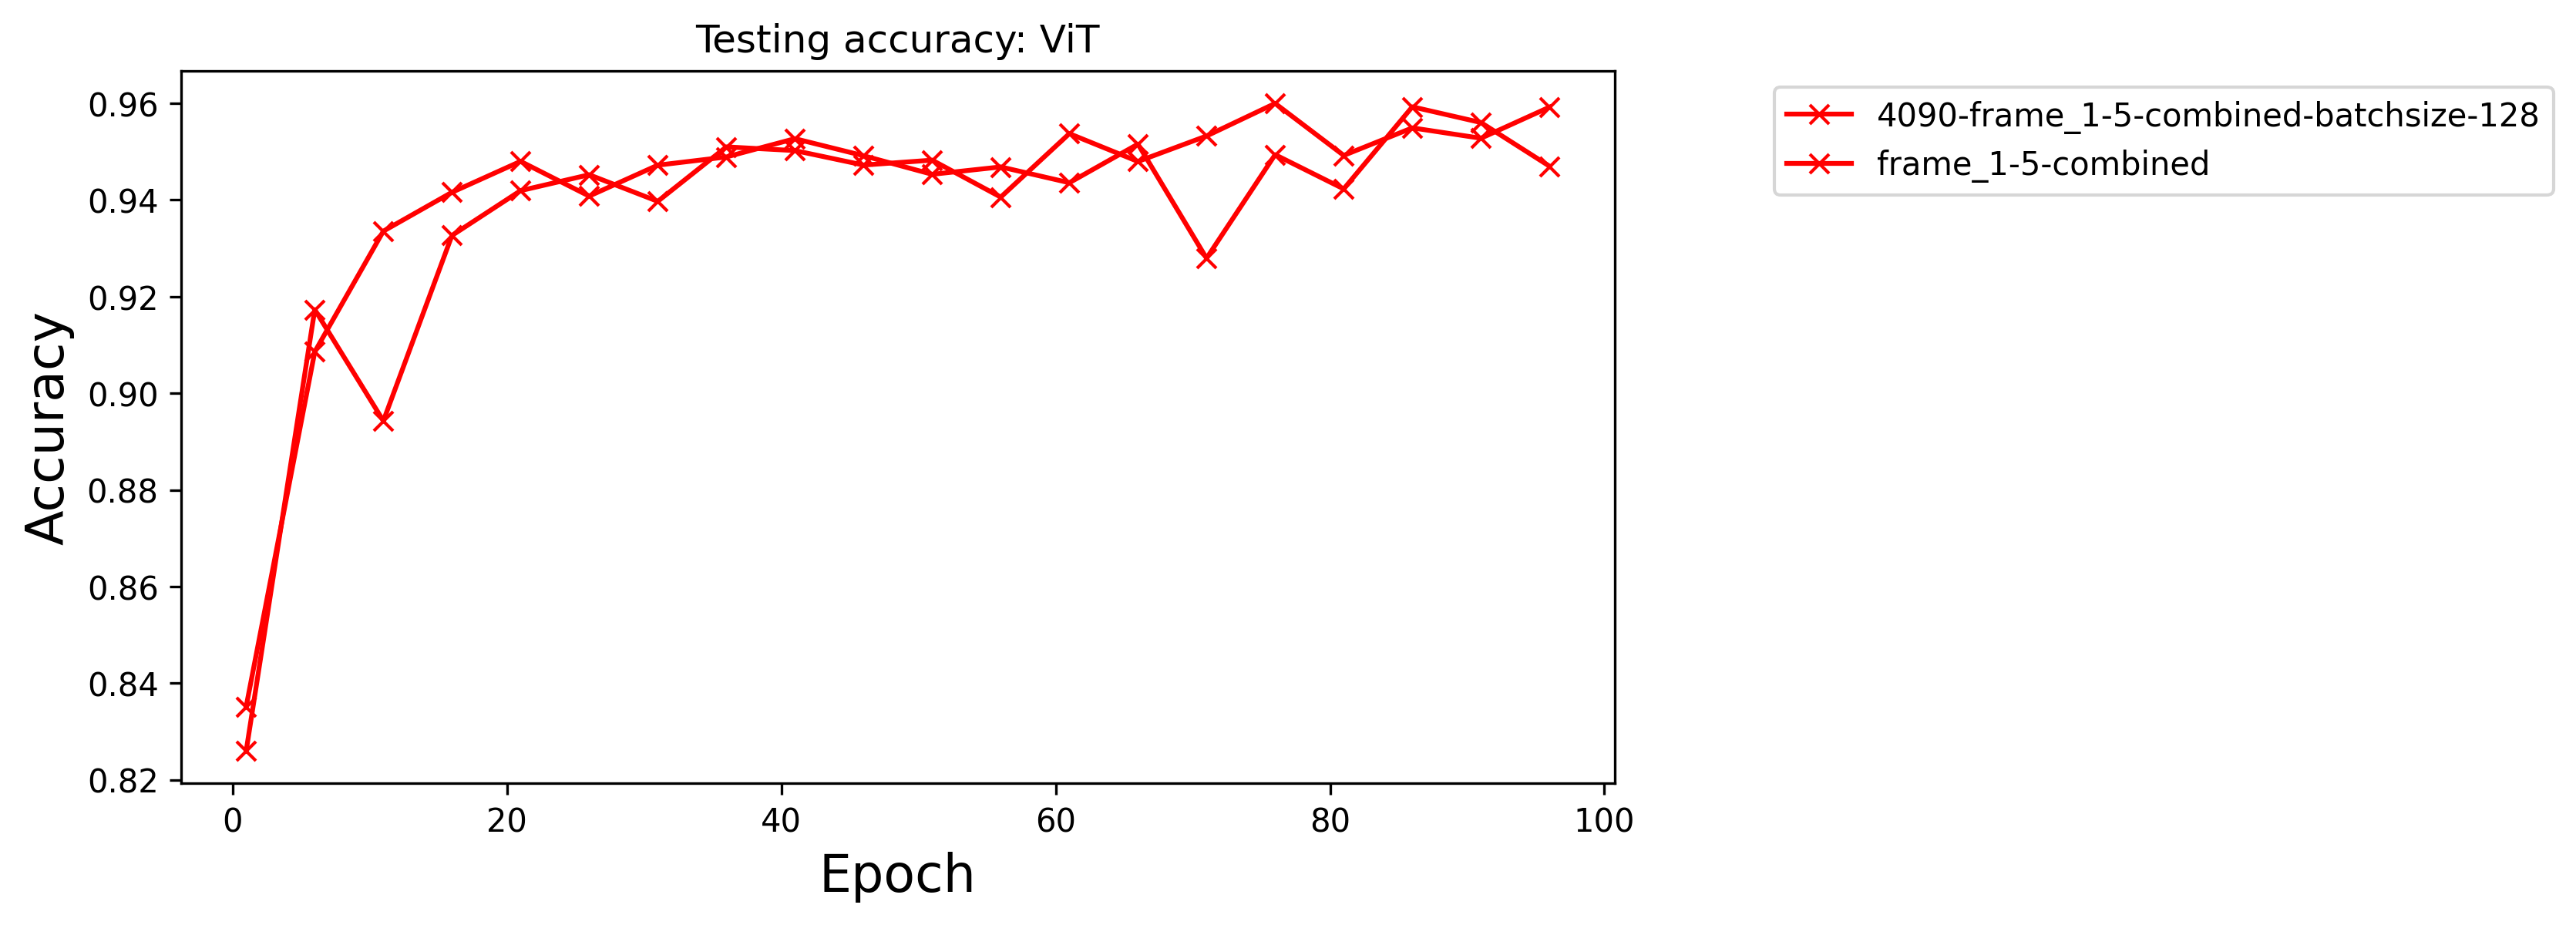

In [13]:
from pathlib import Path
import matplotlib.pyplot as plt
# key = 'train_acc_epoch'

key = 'val_acc_epoch'

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 1, figsize=(8, 4), dpi=300)
axs = [axs]

markers = ['v', '^', '<', '>', '1', 'o', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']

chosen_event_file_indices = range(len(event_files))
chosen_event_files = [event_files[i] for i in chosen_event_file_indices]
chosen_all_extracted_data = [all_extracted_data[i] for i in chosen_event_file_indices]

STEP = 5
for i, data in enumerate(chosen_all_extracted_data):
    if key not in data:
        print(">>> warning: key {} not in data from {}".format(key, chosen_event_files[i]))
        continue
    _avg_accs = [y for x, y in data[key]]

    _label = Path(chosen_event_files[i]).parent.name
    _marker = markers[i % len(markers)]
    if max(_avg_accs) < 0.95 or _label.find("resnet") != -1:
        continue   
    if _label.find("resnet") == -1:
        _marker = 'x'
    else:
        _marker = 'o'
    if _label.find('combined') == -1:
        _color = 'blue'
    else:
        _color = 'red'
    # _color = 'red'
    # Plot the training data
    
    axs[0].plot(range(1, len(_avg_accs) + 1, STEP), _avg_accs[::STEP], marker=_marker, 
                color=_color, 
                label=_label)

plt.legend()

# Add legends to the subplots
for ax in axs:
    ax.legend(loc="upper left", bbox_to_anchor=(1.1,1))

# Set the x-axis and y-axis labels of the subplots
for ax in axs:
    ax.set_xlabel('Epoch', fontsize=16)
    ax.set_ylabel('Accuracy', fontsize=16)

# Set the y-axis range for all subplots
# for ax in axs:
#     ax.set_ylim([0.86, 1])
axs[0].title.set_text('Testing accuracy: ViT')
# axs[0].title.set_text('Training accuracy: ResNet50')

In [15]:
len(event_files), len(all_extracted_data)

(17, 17)

chosen event file indices:  [6, 8, 12, 14, 16]
chosen event files:  ['/home/ken67/livecellx/notebooks/ViT_scripts/ViT_workdirs/ViT_lightning_logs/frame_0-5-mask /events.out.tfevents.1705092098.xing-lab-5.592897.0', '/home/ken67/livecellx/notebooks/ViT_scripts/ViT_workdirs/ViT_lightning_logs/frame_1-5-mask/events.out.tfevents.1705145868.g006', '/home/ken67/livecellx/notebooks/ViT_scripts/ViT_workdirs/ViT_lightning_logs/frame_all_mask/events.out.tfevents.1705145868.g007', '/home/ken67/livecellx/notebooks/ViT_scripts/ViT_workdirs/ViT_lightning_logs/resnet50-frame_1-5-mask/events.out.tfevents.1705146296.g005', '/home/ken67/livecellx/notebooks/ViT_scripts/ViT_workdirs/ViT_lightning_logs/resnet50-frame_all-mask/events.out.tfevents.1705146297.g006']
>>>  /home/ken67/livecellx/notebooks/ViT_scripts/ViT_workdirs/ViT_lightning_logs/frame_0-5-mask /events.out.tfevents.1705092098.xing-lab-5.592897.0
>>> max acc:  0.7355346083641052
>>>  /home/ken67/livecellx/notebooks/ViT_scripts/ViT_workdirs/ViT_

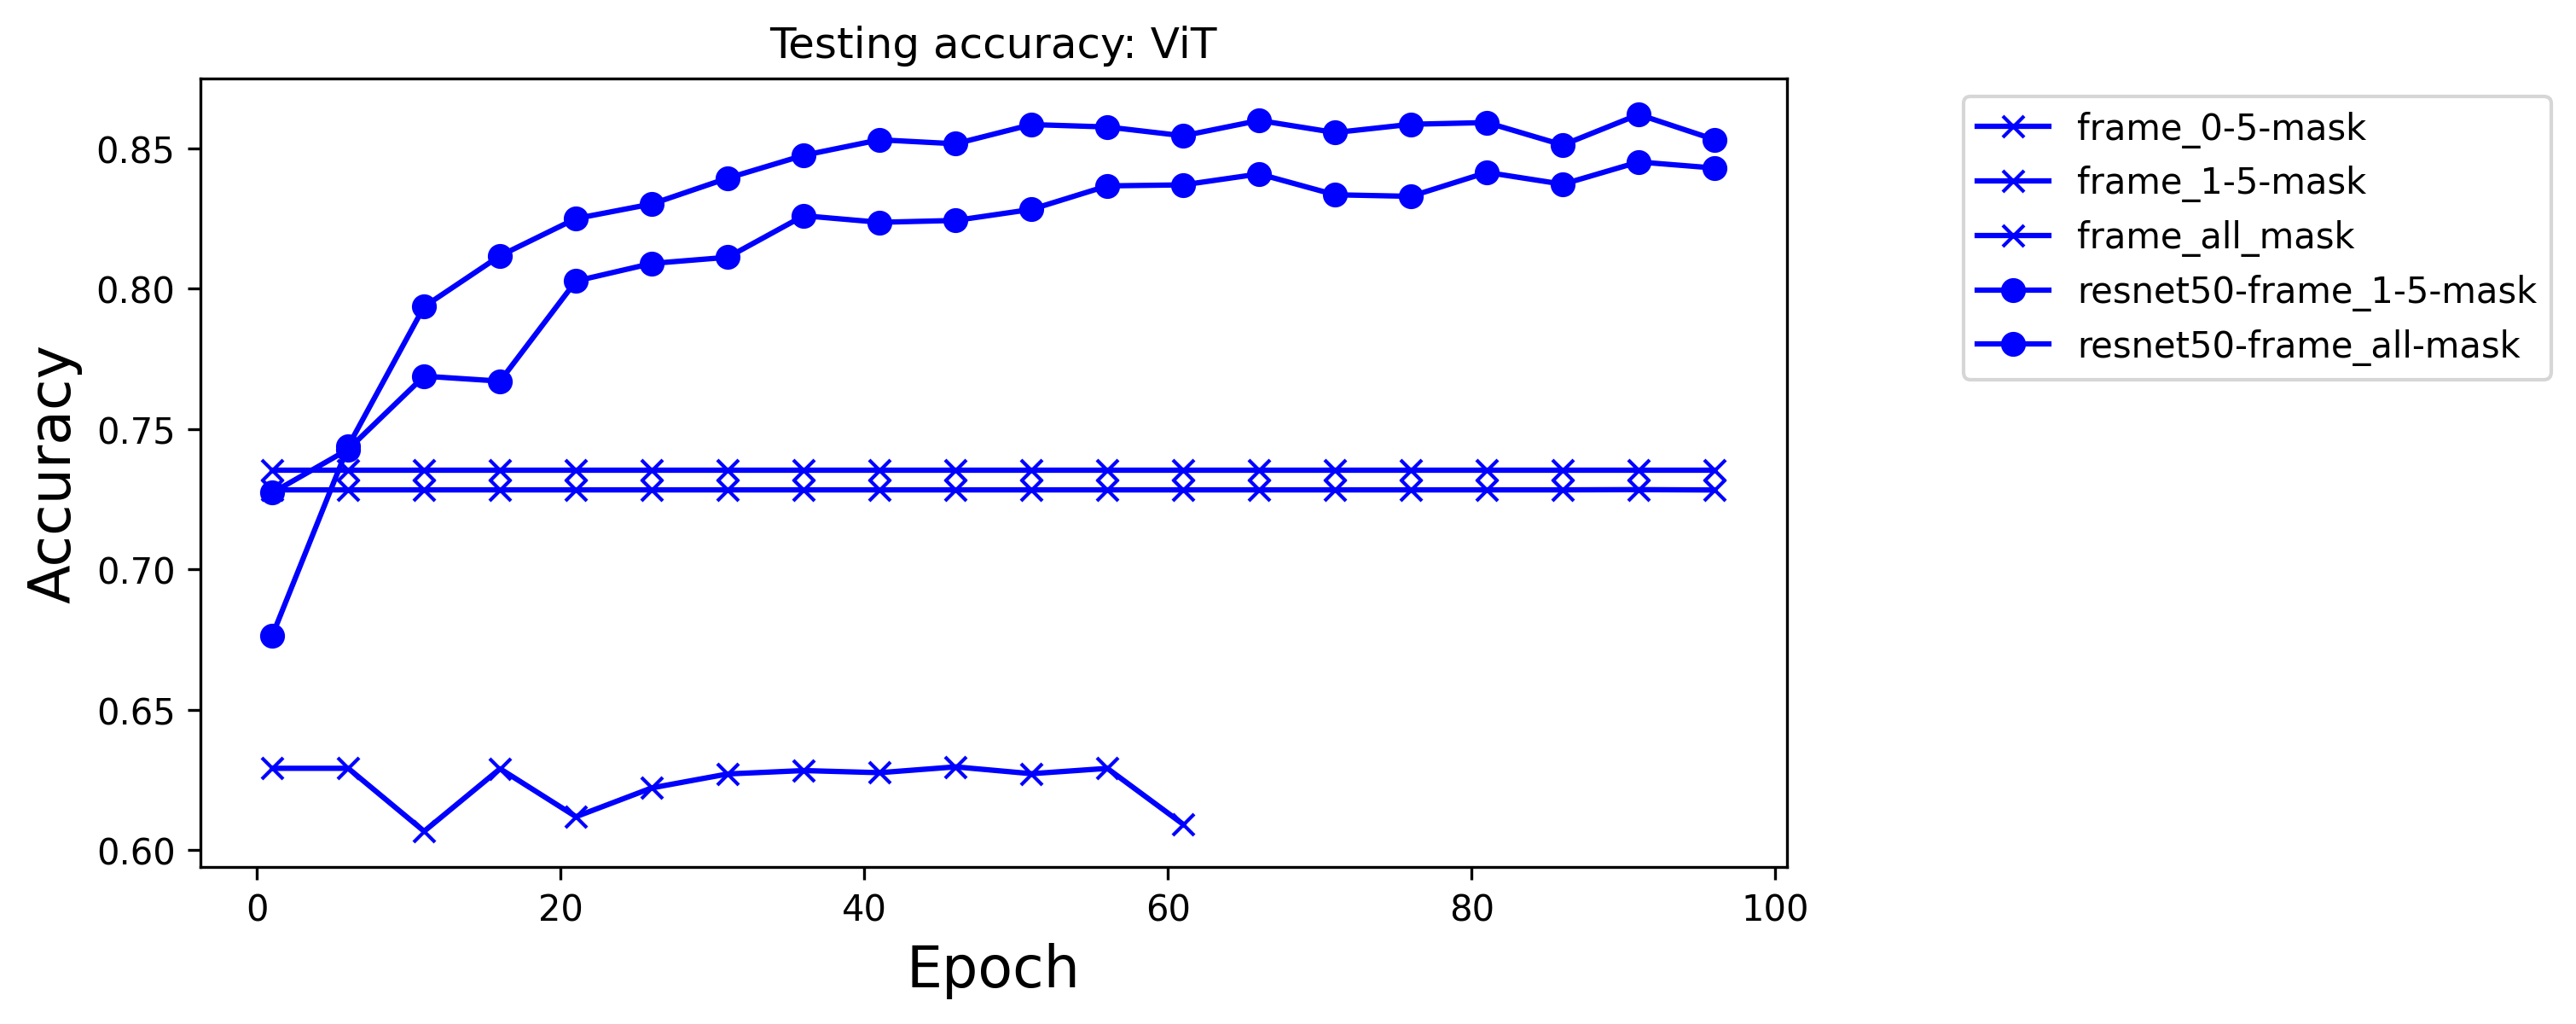

In [23]:
from pathlib import Path
import matplotlib.pyplot as plt
# key = 'train_acc_epoch'

key = 'val_acc_epoch'

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 1, figsize=(8, 4), dpi=300)
axs = [axs]

markers = ['v', '^', '<', '>', '1', 'o', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']

# chosen_event_file_indices = range(len(event_files))
chosen_event_file_indices = [i for i in range(len(event_files)) if event_files[i].find('mask') != -1]
chosen_event_files = [event_file for event_file in event_files if event_file.find('mask') != -1]
chosen_all_extracted_data = [all_extracted_data[i] for i in chosen_event_file_indices]
print("chosen event file indices: ", chosen_event_file_indices)
print("chosen event files: ", chosen_event_files)


STEP = 5
for i, data in enumerate(chosen_all_extracted_data):
    if key not in data:
        print(">>> warning: key {} not in data from {}".format(key, chosen_event_files[i]))
        continue
    _avg_accs = [y for x, y in data[key]]
    print(">>> ", chosen_event_files[i])
    print(">>> max acc: ", max(_avg_accs))
    _label = Path(chosen_event_files[i]).parent.name
    _marker = markers[i % len(markers)]
    # if max(_avg_accs) < 0.95 or _label.find("resnet") != -1:
    #     continue   
    if _label.find("resnet") == -1:
        _marker = 'x'
    else:
        _marker = 'o'
    if _label.find('combined') == -1:
        _color = 'blue'
    else:
        _color = 'red'
    # _color = 'red'
    # Plot the training data
    
    axs[0].plot(range(1, len(_avg_accs) + 1, STEP), _avg_accs[::STEP], marker=_marker, 
                color=_color, 
                label=_label)

plt.legend()

# Add legends to the subplots
for ax in axs:
    ax.legend(loc="upper left", bbox_to_anchor=(1.1,1))

# Set the x-axis and y-axis labels of the subplots
for ax in axs:
    ax.set_xlabel('Epoch', fontsize=16)
    ax.set_ylabel('Accuracy', fontsize=16)

# Set the y-axis range for all subplots
# for ax in axs:
#     ax.set_ylim([0.86, 1])
axs[0].title.set_text('Testing accuracy: ViT')
# axs[0].title.set_text('Training accuracy: ResNet50')